In [2]:
import pandas as pd

try:
    df = pd.read_csv('Location1.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'Location1.csv' not found. Please ensure the file exists in the current directory or provide the correct path.")
except pd.errors.ParserError:
    print("Error: Unable to parse 'Location1.csv'. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793


In [ ]:
# Data Shape
print("Data Shape:", df.shape)

# Data Types
print("\nData Types:\n", df.dtypes)

# Summary Statistics
print("\nSummary Statistics:\n", df.describe())

# Missing Values
print("\nMissing Values:\n", df.isnull().sum())

# Unique Values
for col in df.columns:
    print(f"\nUnique values in column '{col}':")
    if df[col].dtype == 'object':
        print(df[col].value_counts())
    else:
        print(f"Number of unique values: {df[col].nunique()}")
        print(f"First 5 unique values: {df[col].unique()[:5]}")

Data Shape: (43800, 10)

Data Types:
 Time                    object
temperature_2m         float64
relativehumidity_2m      int64
dewpoint_2m            float64
windspeed_10m          float64
windspeed_100m         float64
winddirection_10m        int64
winddirection_100m       int64
windgusts_10m          float64
Power                  float64
dtype: object

Summary Statistics:
        temperature_2m  relativehumidity_2m   dewpoint_2m  windspeed_10m  \
count    43800.000000         43800.000000  43800.000000   43800.000000   
mean        47.862911            72.288744     38.569308       3.591147   
std         19.453691            16.852287     18.772110       1.649318   
min        -14.400000            18.000000    -17.100000       0.000000   
25%         32.100000            60.000000     24.300000       2.410000   
50%         47.300000            74.000000     38.100000       3.300000   
75%         64.500000            86.000000     54.700000       4.590000   
max         94.1

Error creating time series plot: index 9 is out of bounds for axis 0 with size 9


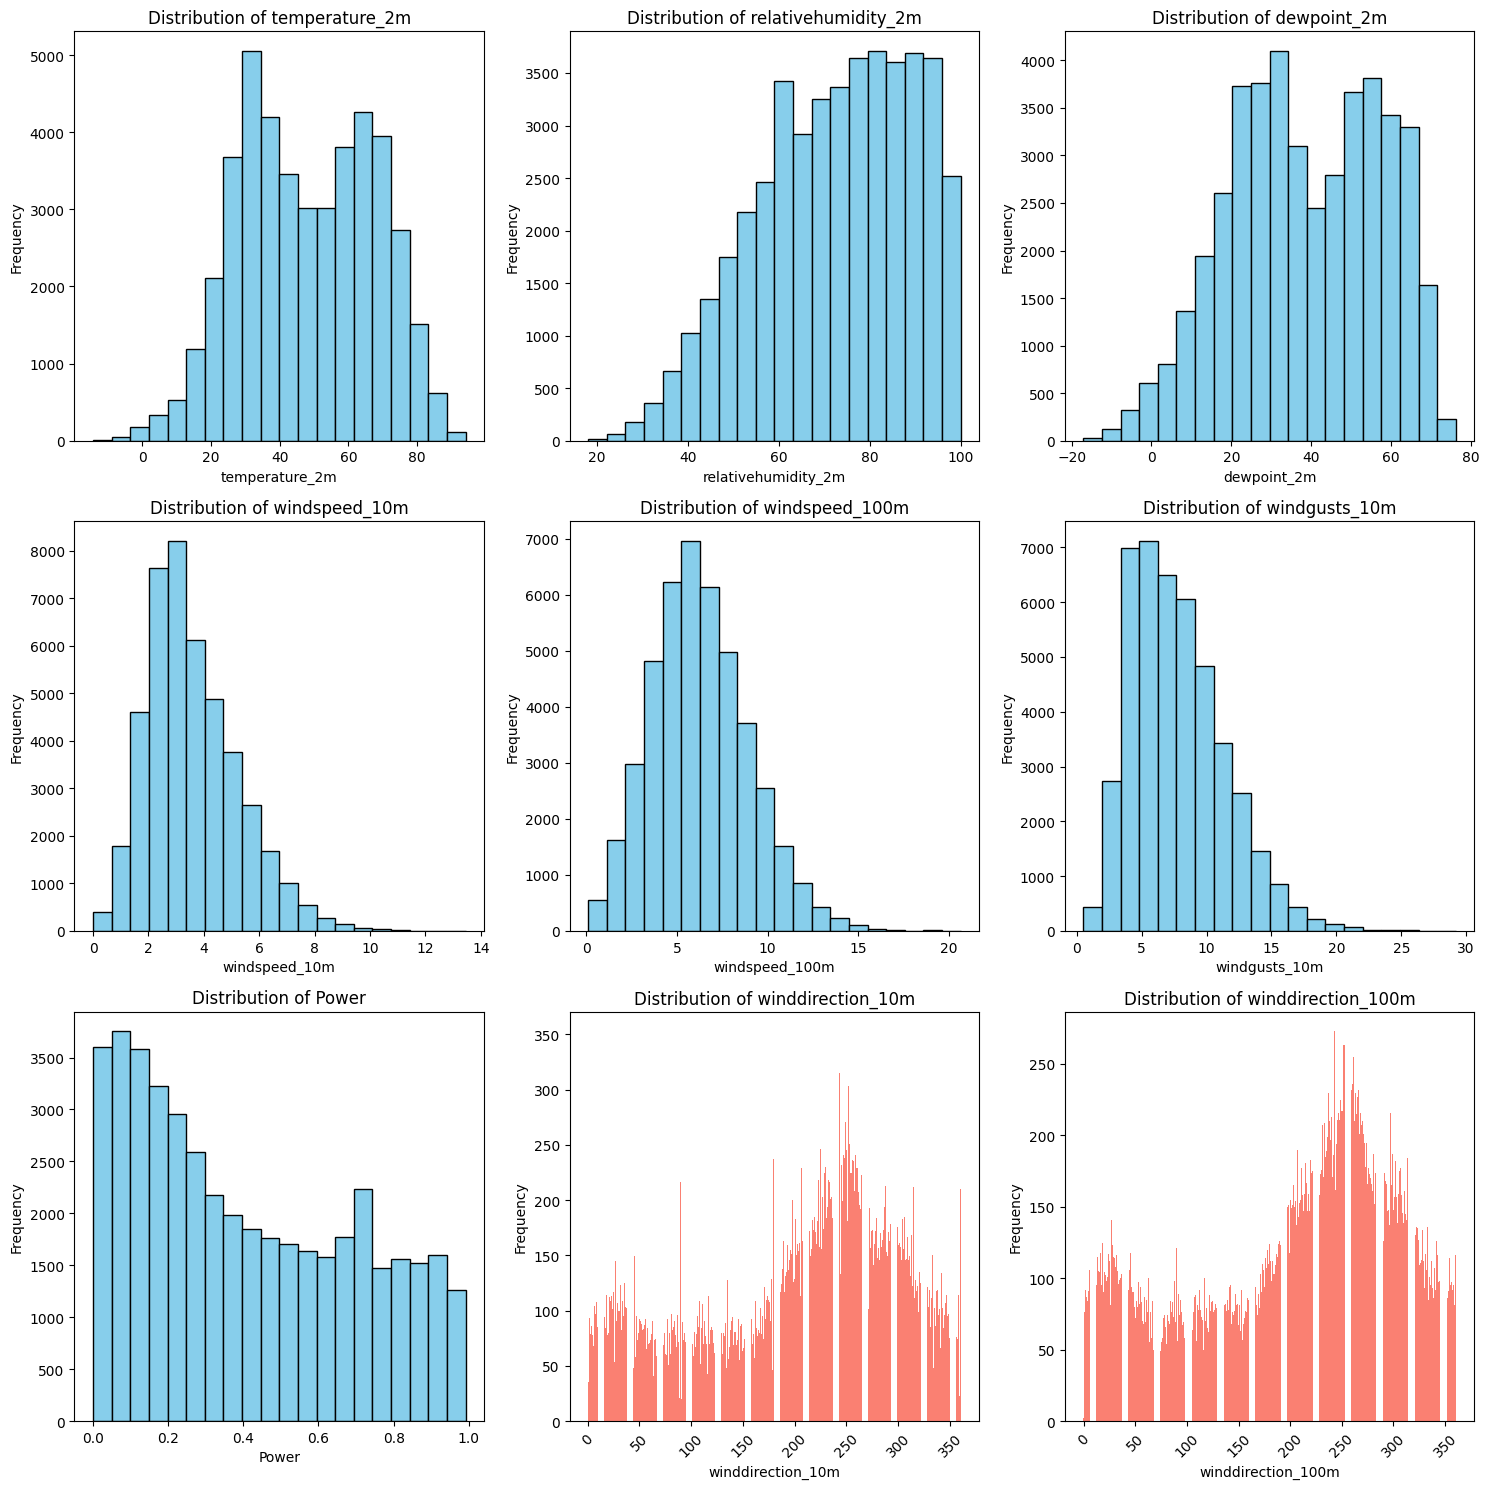

In [ ]:
import matplotlib.pyplot as plt

# Numerical features
numerical_features = ['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'windspeed_10m', 'windspeed_100m', 'windgusts_10m', 'Power']
num_plots = len(numerical_features)
fig, axes = plt.subplots(nrows=(num_plots + 2) // 3, ncols=min(3, num_plots), figsize=(15, 5 * ((num_plots + 2) // 3)))
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(numerical_features):
    axes[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Categorical features
categorical_features = ['winddirection_10m', 'winddirection_100m']
for i, col in enumerate(categorical_features):
    ax_idx = num_plots + i
    axes[ax_idx].bar(df[col].value_counts().index, df[col].value_counts().values, color='salmon')
    axes[ax_idx].set_title(f'Distribution of {col}')
    axes[ax_idx].set_xlabel(col)
    axes[ax_idx].set_ylabel('Frequency')
    axes[ax_idx].tick_params(axis='x', rotation=45)

# Time series plot
try:
    df['Time'] = pd.to_datetime(df['Time'])
    ax_idx = num_plots + len(categorical_features)
    axes[ax_idx].plot(df['Time'], df['Power'], marker='o', linestyle='-', color='green')
    axes[ax_idx].set_title('Power over Time')
    axes[ax_idx].set_xlabel('Time')
    axes[ax_idx].set_ylabel('Power')
    plt.xticks(rotation=45)
except Exception as e:
    print(f"Error creating time series plot: {e}")

plt.tight_layout()
plt.show()


Not enough axes to plot the time series data.


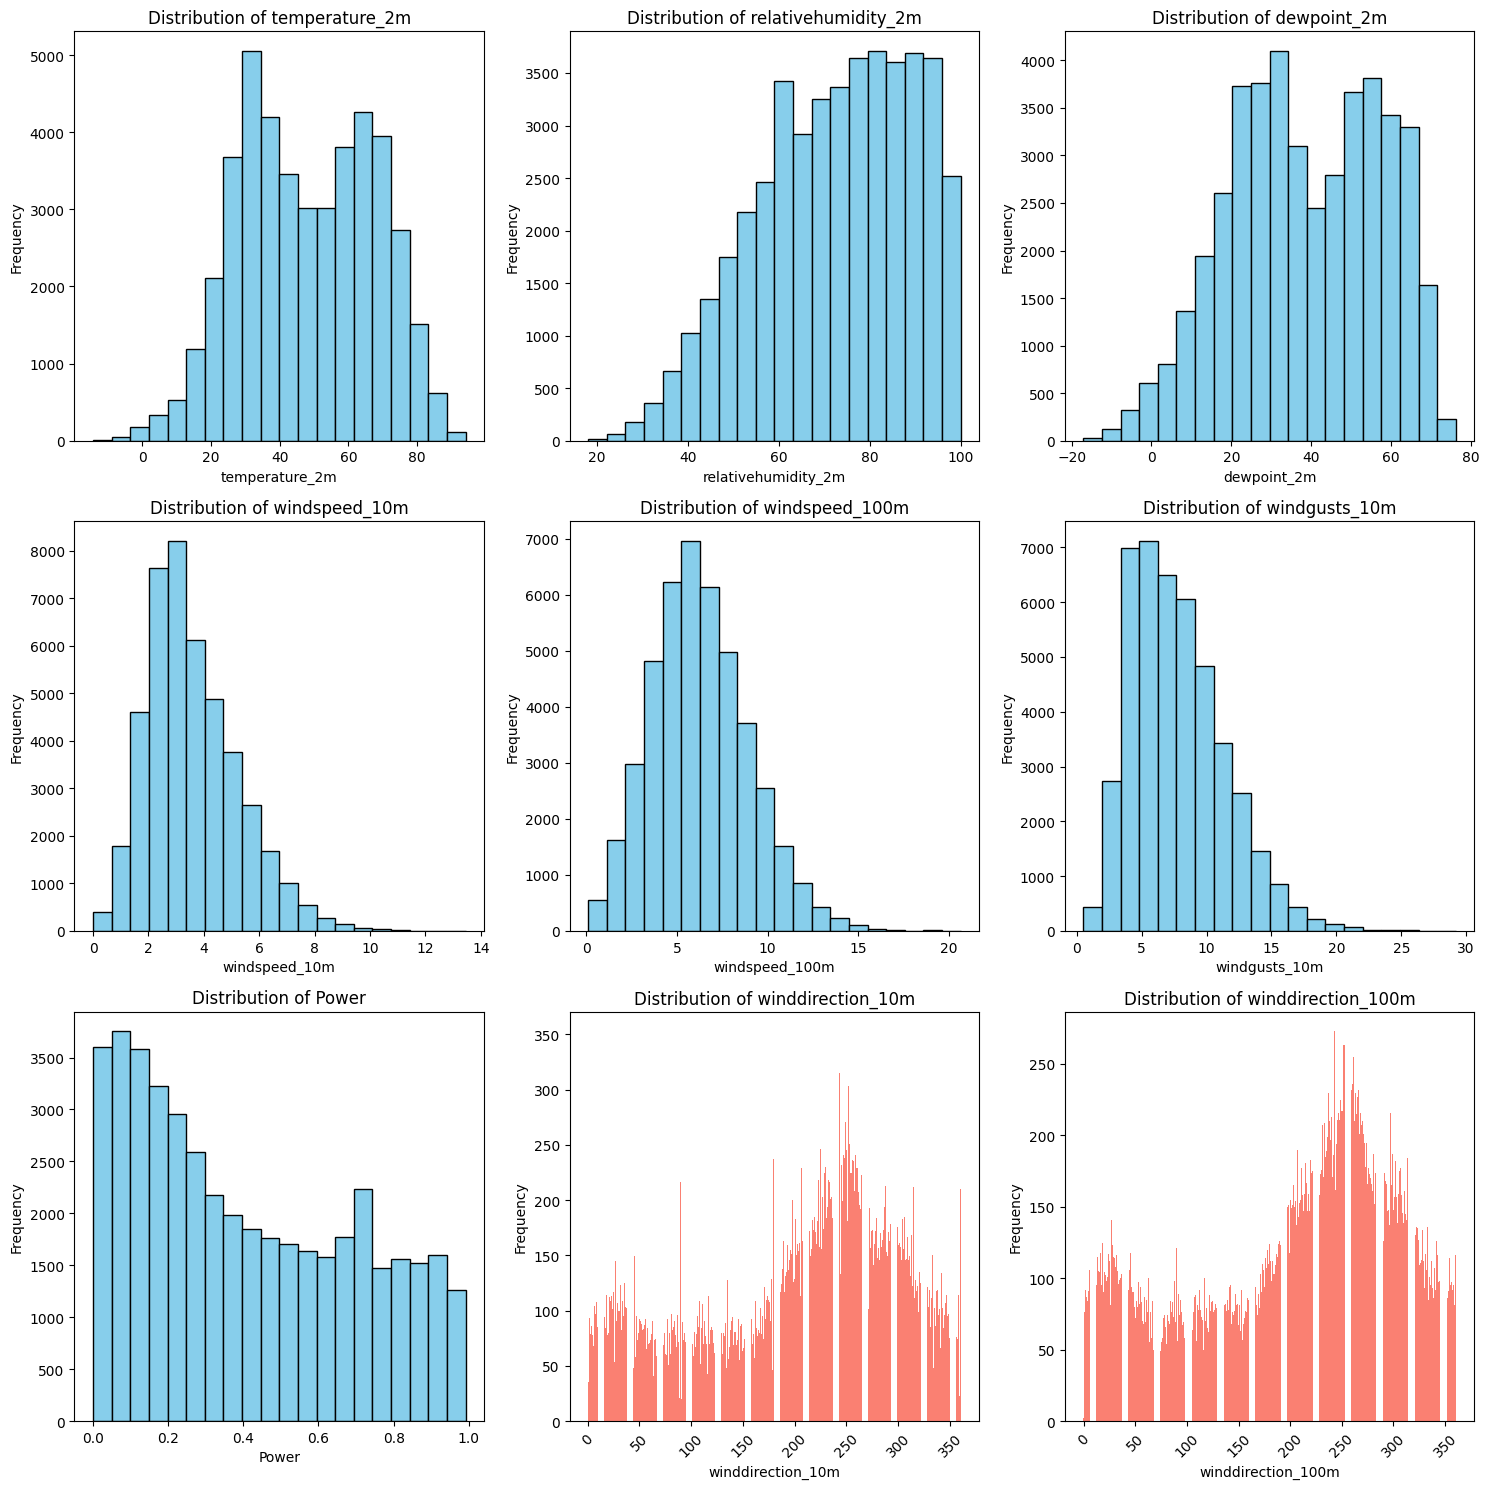

In [ ]:
import matplotlib.pyplot as plt

# Numerical features
numerical_features = ['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'windspeed_10m', 'windspeed_100m', 'windgusts_10m', 'Power']
num_plots = len(numerical_features)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(numerical_features):
    if i < len(axes):
        axes[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
    else:
        break


# Categorical features
categorical_features = ['winddirection_10m', 'winddirection_100m']
for i, col in enumerate(categorical_features):
    ax_idx = num_plots + i
    if ax_idx < len(axes):
      axes[ax_idx].bar(df[col].value_counts().index, df[col].value_counts().values, color='salmon')
      axes[ax_idx].set_title(f'Distribution of {col}')
      axes[ax_idx].set_xlabel(col)
      axes[ax_idx].set_ylabel('Frequency')
      axes[ax_idx].tick_params(axis='x', rotation=45)
    else:
      break


# Time series plot
try:
    df['Time'] = pd.to_datetime(df['Time'])
    ax_idx = num_plots + len(categorical_features)
    if ax_idx < len(axes):
        axes[ax_idx].plot(df['Time'], df['Power'], marker='o', linestyle='-', color='green')
        axes[ax_idx].set_title('Power over Time')
        axes[ax_idx].set_xlabel('Time')
        axes[ax_idx].set_ylabel('Power')
        plt.xticks(rotation=45)
    else:
        print("Not enough axes to plot the time series data.")
except Exception as e:
    print(f"Error creating time series plot: {e}")

# Remove any unused subplots
for i in range(len(numerical_features) + len(categorical_features) + 1, len(axes)):
    fig.delaxes(axes[i])


plt.tight_layout()
plt.show()

In [ ]:
# Calculate descriptive statistics for numerical features
numerical_features = ['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'windspeed_10m', 'windspeed_100m', 'windgusts_10m', 'Power']
descriptive_stats = df[numerical_features].describe()
print("Descriptive Statistics for Numerical Features:\n", descriptive_stats)

# Analyze frequency of unique values for categorical features
categorical_features = ['winddirection_10m', 'winddirection_100m']
for col in categorical_features:
    print(f"\nFrequency of Unique Values for {col}:\n{df[col].value_counts()}")

# Analyze the results (look for patterns, outliers, etc.)
print("\nAnalysis of Statistics and Frequencies:")
# Example analysis (replace with your own observations):
# Check for outliers in numerical features (e.g., unusually high/low values)
# Check for disproportionately high/low frequencies in categorical features
# Example: Check if there's a specific wind direction that occurs much more frequently than others.
# Example: Look for any potential relationships between wind speed/direction and power output

Descriptive Statistics for Numerical Features:
        temperature_2m  relativehumidity_2m   dewpoint_2m  windspeed_10m  \
count    43800.000000         43800.000000  43800.000000   43800.000000   
mean        47.862911            72.288744     38.569308       3.591147   
std         19.453691            16.852287     18.772110       1.649318   
min        -14.400000            18.000000    -17.100000       0.000000   
25%         32.100000            60.000000     24.300000       2.410000   
50%         47.300000            74.000000     38.100000       3.300000   
75%         64.500000            86.000000     54.700000       4.590000   
max         94.100000           100.000000     76.300000      13.450000   

       windspeed_100m  windgusts_10m         Power  
count    43800.000000   43800.000000  43800.000000  
mean         6.284431       7.771795      0.405385  
std          2.685216       3.569147      0.288322  
min          0.100000       0.500000      0.000000  
25%        